# Mini Challenge Fourier Transformation

Dias Ziel dieser Aufgabe besteht darin, dass Sie ein grundlegendes Verständnis der Fouriertransformation
zur Näherung von periodischen Funktionen und dessen praktische Anwendung zur
Datenanalyse und -bearbeitung erlangen. Hierfür sollen Sie ein Jupyter Notebook erstellen, in
dem Sie die unten aufgeführten Aufgaben nacheinander bearbeiten. Zunächst werden Sie die
Fouriertransformation in numpy selbst implementieren und damit drei Funktionen fitten. Danach
werden Sie nacheinander Sonnendaten, Musik und Bilder mithilfe von Fouriertransformationen
analysieren und bearbeiten.
Ziel dieser Aufgabe ist nicht nur, Ihre mathematischen Kenntnisse unter Beweis zu stellen, sondern
auch die entsprechende Kommunikation und Präsentation Ihrer Ergebnisse. Ihre Abgaben sollen
also nicht nur mathematisch korrekt, sondern auch leicht verständlich und reproduzierbar
sein. Genauere Angaben zu den Erwartungen an die Abgabe finden Sie in den Auswertungskriterien.
Dokumentieren Sie ihren Arbeitsfortschritt und Erkenntnisgewinn in Form eines Lerntagebuchs,
um Lernfortschritte, Schwierigkeiten und Erkenntnisse festzuhalten.
Die folgenden Aufgabenstellungen präzisieren die einzelnen Bearbeitungsschritte und geben die
Struktur des Notebooks vor

# Aufgabe 1.
In dieser Aufgabe implementieren Sie die Berechnung der Fourier-Approximation in numpy (kein
fft)

## Aufgabe 1 a
(a) Implementieren Sie mit numpy eine Methode zur Berechnung der k-ten Fourier-Komponente
einer Funktion gegeben durch arrays x und y mithilfe der Trapezregel (np.trapz).

In [1]:
# CODE von ChatGPT

import numpy as np

def kth_fourier_component(x, y, k):
    """
    Berechnet die k-te Fourier-Komponente der gegebenen Funktion.

    Parameters:
    x : numpy.array
        Die x-Werte der Funktion.
    y : numpy.array
        Die y-Werte der Funktion.
    k : int
        Die Nummer der Fourier-Komponente, die berechnet werden soll.

    Returns:
    tuple
        Die Koeffizienten a_k und b_k der k-te Fourier-Komponente.
    """

    # Berechnung der Periode der Funktion
    T = x[-1] - x[0]

    # Berechnung der k-ten Frequenz
    omega_k = 2 * np.pi * k / T

    # Berechnung der k-ten Fourier-Koeffizienten
    y_cos = y * np.cos(omega_k * x)
    y_sin = y * np.sin(omega_k * x)
    a_k = (2 / T) * np.trapz(y_cos, x)
    b_k = (2 / T) * np.trapz(y_sin, x)

    return a_k, b_k


## Aufgabe 1 b
(b) Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation
fapp mit einer gegebenen Anzahl (2m + 1) von Fourier-Komponenten.

In [2]:
# CODE von ChatGPT

def fourier_approximation(x, y, m):
    """
    Berechnet eine Fourier-Approximation für die gegebenen Daten bis zur m-ten Komponente.

    Parameters:
    x : numpy.array
        Die x-Werte der Funktion.
    y : numpy.array
        Die y-Werte der Funktion.
    m : int
        Die Anzahl der Fourier-Komponenten, die in der Approximation berücksichtigt werden sollen.

    Returns:
    numpy.array
        Die Fourier-Approximation der Funktion.
    """

    # Anzahl der Datenpunkte und Periode der Funktion
    N = len(x)
    T = x[-1] - x[0]

    # Initialisierung des Fourier-Approximationsarrays
    fapp = np.zeros(N)

    # Berechnung und Addition des Nullten Fourier-Koeffizienten
    a_0 = (1 / T) * np.trapz(y, x)
    fapp += a_0

    # Berechnung und Addition der restlichen Fourier-Komponenten
    for k in range(1, m + 1):
        a_k, b_k = kth_fourier_component(x, y, k)
        fapp += a_k * np.cos(2 * np.pi * k * x / T) + b_k * np.sin(2 * np.pi * k * x / T)

    return fapp

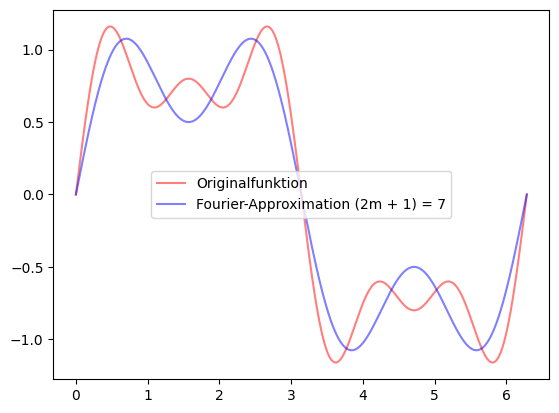

In [3]:
# Beispiel von ChatGPT
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x) + 0.5 * np.sin(3 * x) + 0.3 * np.sin(5 * x)

m = 3
fapp = fourier_approximation(x, y, m)

plt.plot(x, y, label='Originalfunktion', color='red', alpha=0.5)
plt.plot(x, fapp, label=f'Fourier-Approximation (2m + 1) = {2 * m + 1}', color = 'blue', alpha=0.5)
plt.legend()
plt.show()

## Aufgabe 1 c 
(c) Nähern Sie die Funktion f1(x) = 1/(ex +e−x) auf dem Intervall [−3, 3] (Auflösung: N = 600
Schritte) mit verschiedenen Anzahlen von Komponenten (2m+1). Plotten Sie den Vergleich
zur Originalfunktion f.

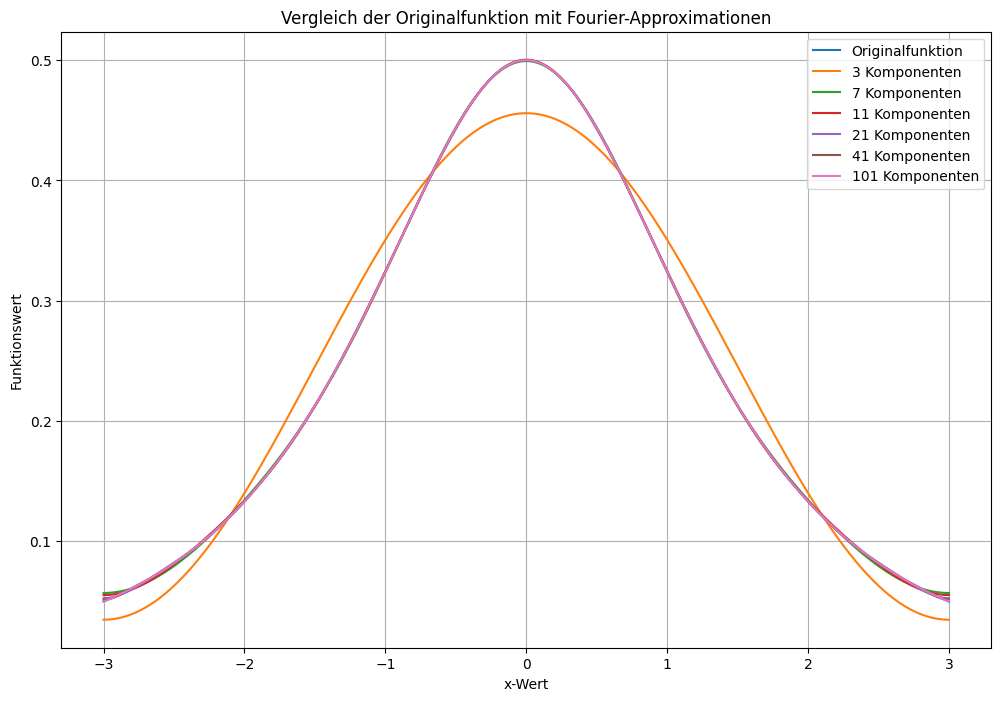

In [4]:
# CODE von ChatGPT

# Definition der Funktion f1
def f1(x):
    return 1 / (np.exp(x) + np.exp(-x))

# Definition der Anzahl der Schritte und des Intervalls
N = 600
x_min = -3
x_max = 3

# Erstellen des x-Bereichs
x = np.linspace(x_min, x_max, N)

# Auswertung der Funktion f1
y = f1(x)

# Liste der zu betrachtenden Komponentenanzahlen
component_counts = [1, 3, 5, 10, 20, 50]

# Erstellen des Plots der Originalfunktion
plt.figure(figsize=(12, 8))
plt.plot(x, y, label='Originalfunktion')

# Berechnung und Plotten der Fourier-Approximationen
for m in component_counts:
    fapp = fourier_approximation(x, y, m)
    plt.plot(x, fapp, label=f'{2*m+1} Komponenten')

# Hinzufügen von Achsentiteln und einem Diagrammtitel
plt.xlabel('x-Wert')
plt.ylabel('Funktionswert')
plt.title('Vergleich der Originalfunktion mit Fourier-Approximationen')

# Hinzufügen einer Legende und Anzeigen des Plots
plt.legend()

# Hinzufügen von Gitternetzlinien
plt.grid(True)

plt.show()

## Aufgabe 1 d
(d) Bestimmen Sie die Anzahl der Fourier-Komponenten, die benötigt werden, um eine Approximation
mit höchstens 0,1% relativen Fehler zu erhalten.

Anzahl der benötigten Fourier-Komponenten: 21


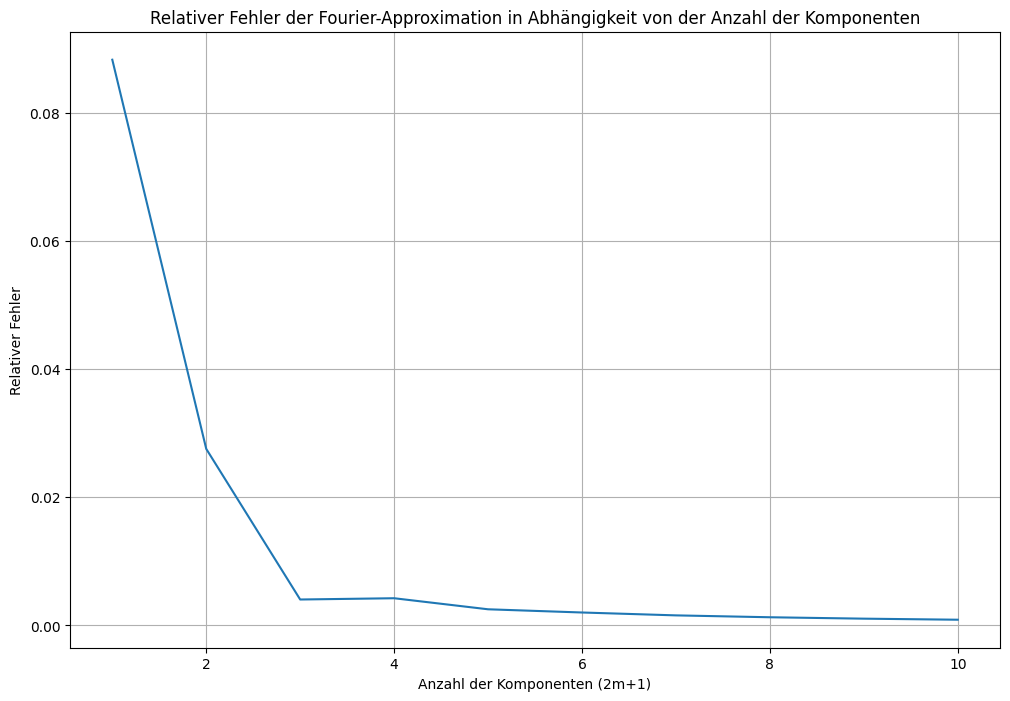

In [5]:
# CODE von ChatGPT, while mit for ersetzt und Funktion zum Plot eingefügt.

def relative_error(y_true, y_approx):
    mse = np.mean(np.abs(y_true - y_approx))
    energy = np.mean(np.abs(y_true))
    return mse / energy

# Initialisierung der Variablen
m = 0
rel_error = 1

# Berechnung der Fourier-Approximationen und Prüfung des relativen Fehlers
errors = []
while rel_error > 0.001: # 0,1% Fehler
    m += 1
    fapp = fourier_approximation(x, y, m)
    rel_error = relative_error(y, fapp)
    errors.append(rel_error)

print(f"Anzahl der benötigten Fourier-Komponenten: {2*m+1}")

# Erstellen eines Plots des relativen Fehlers
plt.figure(figsize=(12, 8))
plt.plot(range(1, m+1), errors)

# Hinzufügen von Achsentiteln und einem Diagrammtitel
plt.xlabel('Anzahl der Komponenten (2m+1)')
plt.ylabel('Relativer Fehler')
plt.title('Relativer Fehler der Fourier-Approximation in Abhängigkeit von der Anzahl der Komponenten')

# Hinzufügen von Gitternetzlinien
plt.grid(True)

plt.show()

## Aufgabe 1 e
(e) Versuchen Sie die Funktionen f2(x) = ex und f3(x) = e|x| auf dem Intervall [−3, 3] (Auflösung:
N = 600 Schritte) mit einem 0,1%igen Approximationsfehler anzunähern. Beschreiben und
erklären Sie die Unterschiede.

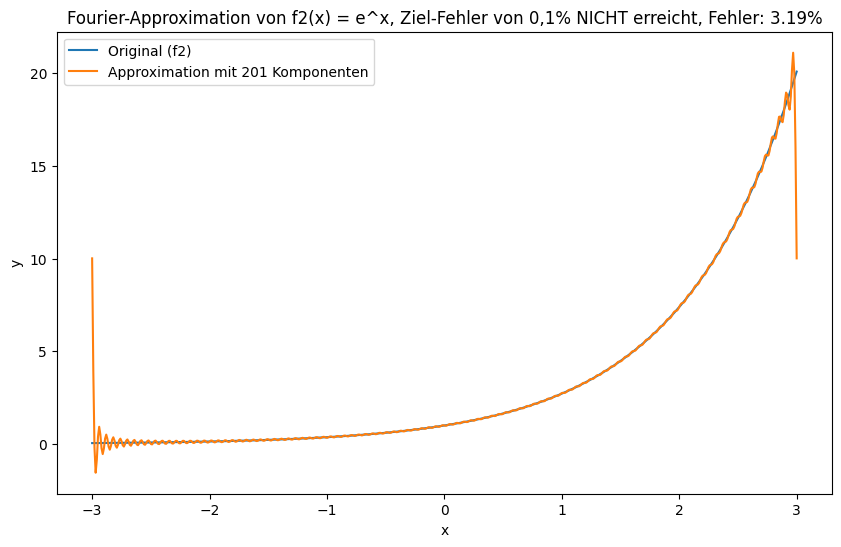

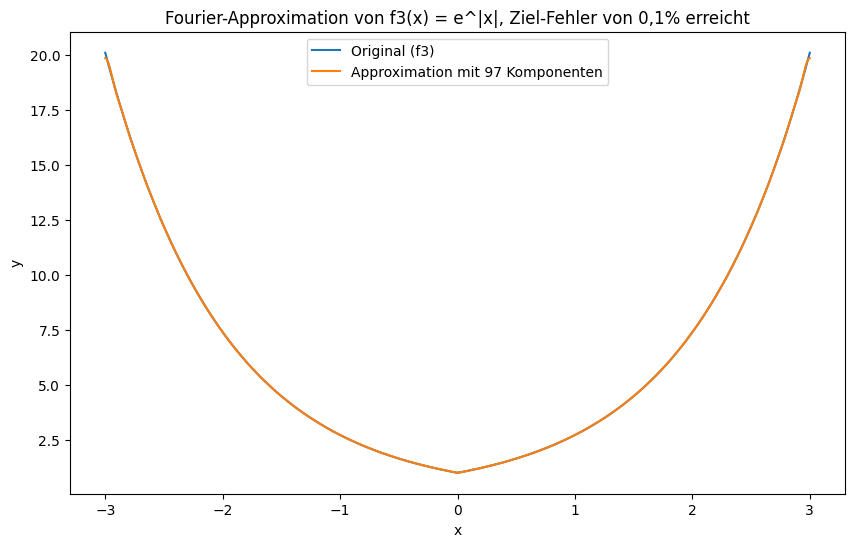

In [6]:
# CODE von ChatGPT

# Definition von f2 und f3
def f2(x):
    return np.exp(x)

def f3(x):
    return np.exp(np.abs(x))

# Erstellung des x-Bereichs
N = 600
x_min = -3
x_max = 3
x = np.linspace(x_min, x_max, N)

# Berechnung der Fourier-Approximation für f2
y = f2(x)
m = 0
rel_error = 1
while rel_error > 0.001 and m < 100: # 0,1% Fehler, max 100 Komponenten
    m += 1
    fapp = fourier_approximation(x, y, m)
    rel_error = relative_error(y, fapp)

# Überprüfung, ob der Fehler kleiner als 0,1% ist, und Anpassung des Titels entsprechend
if rel_error <= 0.001:
    error_message = "Ziel-Fehler von 0,1% erreicht"
else:
    error_message = f"Ziel-Fehler von 0,1% NICHT erreicht, Fehler: {rel_error*100:.2f}%"

# Erstellung des Plots für f2
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Original (f2)")
plt.plot(x, fapp, label=f"Approximation mit {2*m+1} Komponenten")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Fourier-Approximation von f2(x) = e^x, {error_message}")
plt.legend()
plt.show()

# Berechnung der Fourier-Approximation für f3
y = f3(x)
m = 0
rel_error = 1
while rel_error > 0.001 and m < 100: # 0,1% Fehler, max 100 Komponenten
    m += 1
    fapp = fourier_approximation(x, y, m)
    rel_error = relative_error(y, fapp)

# Überprüfung, ob der Fehler kleiner als 0,1% ist, und Anpassung des Titels entsprechend
if rel_error <= 0.001:
    error_message = "Ziel-Fehler von 0,1% erreicht"
else:
    error_message = f"Ziel-Fehler von 0,1% NICHT erreicht, Fehler: {rel_error*100:.2f}%"

# Erstellung des Plots für f3
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Original (f3)")
plt.plot(x, fapp, label=f"Approximation mit {2*m+1} Komponenten")
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Fourier-Approximation von f3(x) = e^|x|, {error_message}")
plt.legend()
plt.show()

# Aufgabe 2.
In dieser Aufgabe wenden Sie die Fourier-Analyse auf Sonnenfleckendaten an (sunspots.txt). Sie
dürfen dafür die fft routine von numpy oder scipy verwenden.

In [7]:
# CODE von ChatGPT, angepasst wurde nur der Pfad zum File

# Lesen der Daten aus der Datei 'sunspots.txt'
years = []
sunspots = []

with open("data/sunspots.txt", "r") as file:
    for line in file:
        pairs = line.split()
        for i in range(0, len(pairs), 2):
            years.append(int(pairs[i]))
            sunspots.append(float(pairs[i + 1]))

# In numpy arrays umwandeln
years = np.array(years)
sunspots = np.array(sunspots)

# Überprüfen der ersten 10 Elemente
print("Years:", years[:10])
print("Sunspots:", sunspots[:10])


Years: [1700 1701 1702 1703 1704 1705 1706 1707 1708 1709]
Sunspots: [ 5. 11. 16. 23. 36. 58. 29. 20. 10.  8.]


## Aufgabe 2 a
(a) Plotten Sie das Power-Spektrum und finden Sie die dominante Periodizität der Schwingung.
Damit erhalten Sie eine Abschätzung auf die Dauer des Sonnenzyklus.


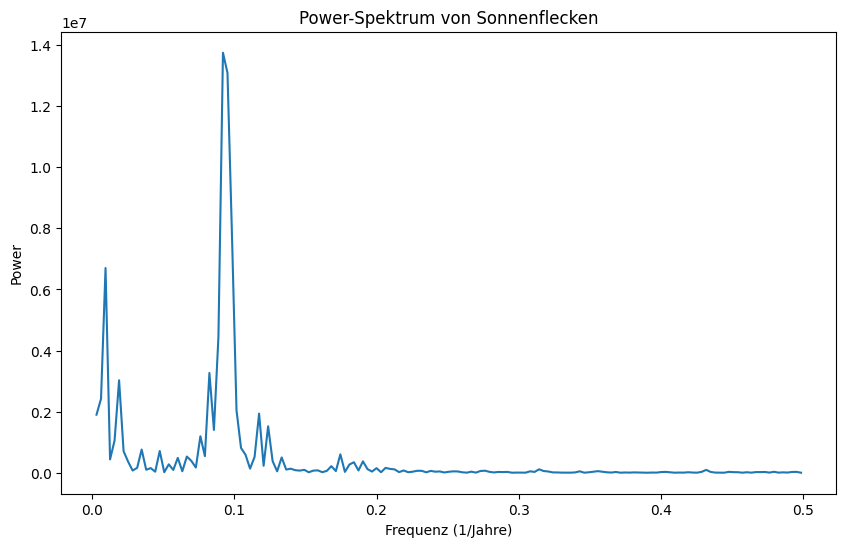

Dominante Periodizität der Sonnenfleckenaktivität: 10.86206896551724 Jahre


In [8]:
# FFT berechnen
fft_vals = np.fft.fft(sunspots)

# Erzeugen von Frequenzen
freqs = np.fft.fftfreq(len(years))

# Filtern der positiven Frequenzen
mask = freqs > 0
fft_vals = fft_vals[mask]
freqs = freqs[mask]

# Power-Spektrum berechnen
power = np.abs(fft_vals)**2

# Plotten des Power-Spektrums
plt.figure(figsize=(10, 6))
plt.plot(freqs, power)
plt.xlabel("Frequenz (1/Jahre)")
plt.ylabel("Power")
plt.title("Power-Spektrum von Sonnenflecken")
plt.show()

# Finden des Index des maximalen Power-Werts
idx_max_power = np.argmax(power)

# Finden der dominanten Frequenz und Umwandlung in Periode (Jahre)
dominant_freq = freqs[idx_max_power]
dominant_period = 1 / dominant_freq

print(f"Dominante Periodizität der Sonnenfleckenaktivität: {dominant_period} Jahre")

## Aufgabe 2 b
(b) Können Sie weitere Perioden in den Sonnenfleck-Daten mithilfe des Fourier-Spektrums
finden?

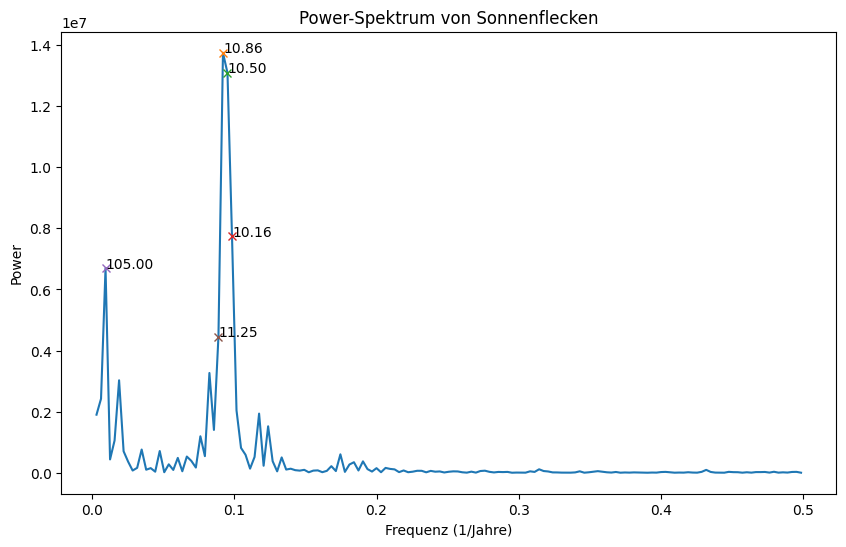

In [9]:
# CODE von ChatGPT

# Benutzerdefinierte Funktion zum Finden der 5 größten Power-Werte
def find_top5_periods(freqs, power):
    # Erstellen Sie ein Array von Tupeln, wobei jedes Tupel aus der Power und der entsprechenden Frequenz besteht
    power_freq_tuples = list(zip(power, freqs))
    
    # Sortieren Sie die Liste der Tupel in absteigender Reihenfolge der Power
    power_freq_tuples.sort(reverse=True)
    
    # Extrahieren Sie die ersten 5 Einträge und trennen Sie die Power von den Frequenzen
    top5_power, top5_freqs = zip(*power_freq_tuples[:5])
    
    return top5_power, top5_freqs

# Lesen der Daten aus der Datei 'sunspots.txt'
# ...
# ...
# Wie vorher 

# Power-Spektrum berechnen
power = np.abs(fft_vals)**2

# Finde die 5 Perioden mit den größten Power-Werten
top5_power, top5_freqs = find_top5_periods(freqs, power)

# Berechne die dominanten Perioden
dominant_periods = 1 / np.array(top5_freqs)

# Plotten des Power-Spektrums
plt.figure(figsize=(10, 6))
plt.plot(freqs, power)
plt.xlabel("Frequenz (1/Jahre)")
plt.ylabel("Power")
plt.title("Power-Spektrum von Sonnenflecken")

# Markieren der dominanten Perioden im Diagramm
for period, power_value, freq in zip(dominant_periods, top5_power, top5_freqs):
    plt.plot(freq, power_value, 'x')
    plt.text(freq, power_value, f'{period:.2f}')

plt.show()

## Aufgabe 2 c
(c) Entfernen Sie einige Komponenten im Fourier-Spektrum und führen dann eine Rücktransformation
durch:
• grössten Komponenten entfernen (k > 20)
• kleinsten Komponenten entfernen (k < 5)
Beschreiben und erklären Sie die Ergebnisse.


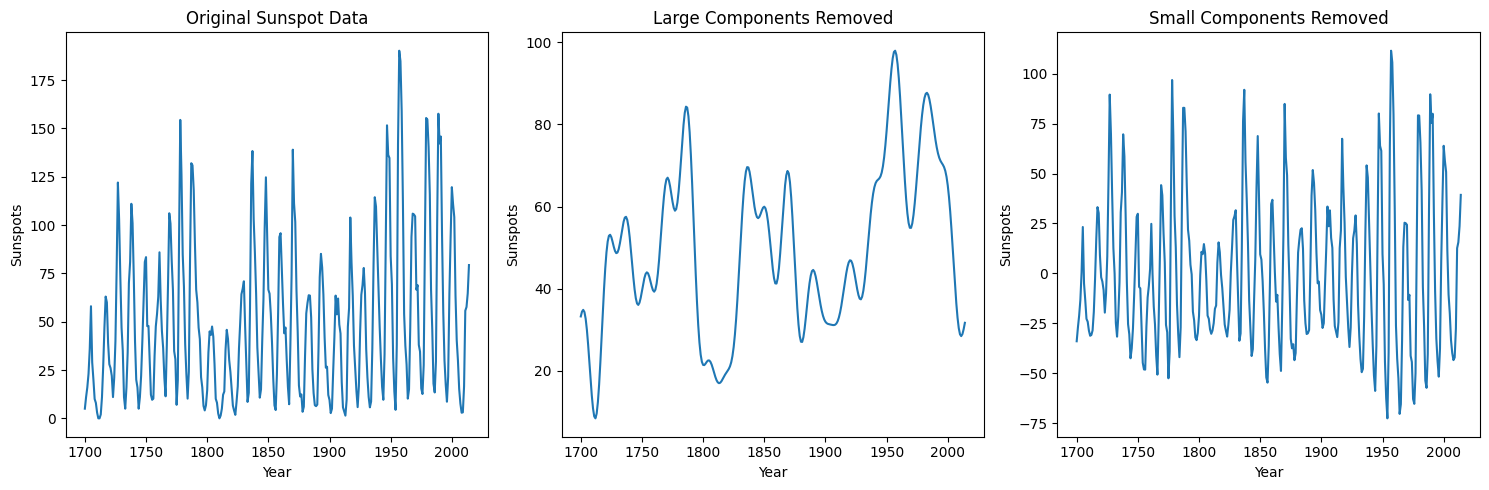

In [10]:
#alte version

# ChatGPT

# Perform Fourier Transform
n = len(sunspots)
freqs = np.fft.fftfreq(n)
fourier_transform = np.fft.fft(sunspots)

# Remove largest components (k > 20)
filtered_large = fourier_transform.copy()
filtered_large[np.abs(freqs * n) > 20] = 0
inverse_large = np.fft.ifft(filtered_large)

# Remove smallest components (k < 5)
filtered_small = fourier_transform.copy()
filtered_small[np.abs(freqs * n) < 5] = 0
inverse_small = np.fft.ifft(filtered_small)

# Extract the real part of the inverse Fourier Transform
inverse_large_real = np.real(inverse_large)
inverse_small_real = np.real(inverse_small)

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(years, sunspots, label='Original Data')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.title('Original Sunspot Data')

plt.subplot(1, 3, 2)
plt.plot(years, inverse_large_real, label='k > 20 removed')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.title('Large Components Removed')

plt.subplot(1, 3, 3)
plt.plot(years, inverse_small_real, label='k < 5 removed')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.title('Small Components Removed')

plt.tight_layout()
plt.show()

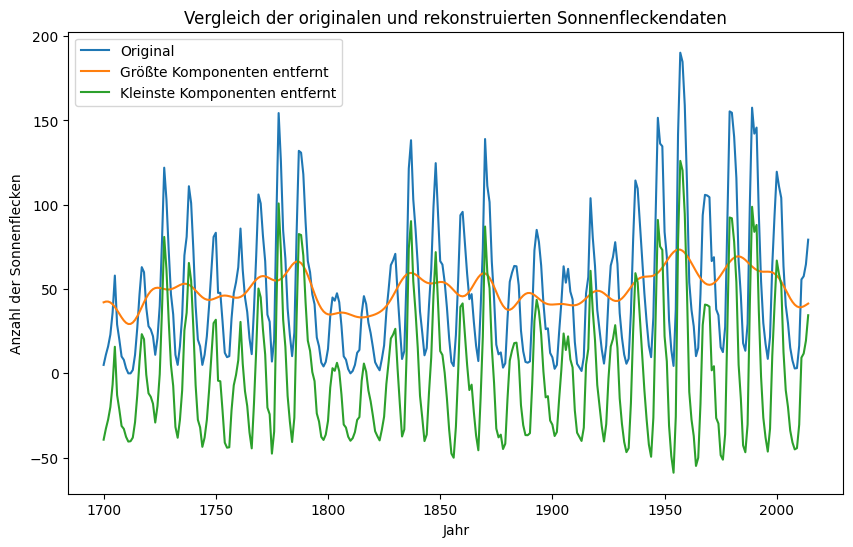

In [11]:
#neue version

# ChatGPT

# Fourier-Transformation
fft_vals = np.fft.fft(sunspots)

# Größte Komponenten entfernen
fft_vals_1 = np.copy(fft_vals)
fft_vals_1[20:] = 0

# Kleinsten Komponenten entfernen
fft_vals_2 = np.copy(fft_vals)
fft_vals_2[:5] = 0

# Inverse Fourier-Transformation
sunspots_reconstructed_1 = np.fft.ifft(fft_vals_1).real
sunspots_reconstructed_2 = np.fft.ifft(fft_vals_2).real

# Plotten der ursprünglichen und rekonstruierten Daten
plt.figure(figsize=(10, 6))

plt.plot(years, sunspots, label="Original")
plt.plot(years, sunspots_reconstructed_1, label="Größte Komponenten entfernt")
plt.plot(years, sunspots_reconstructed_2, label="Kleinste Komponenten entfernt")

plt.xlabel("Jahr")
plt.ylabel("Anzahl der Sonnenflecken")
plt.title("Vergleich der originalen und rekonstruierten Sonnenfleckendaten")
plt.legend()

plt.show()

## Aufagbe 2 d
(d) Vergleichen Sie die Ergebnisse mit denen aus Aufgabe 1. Beschreiben und erklären Sie
Unterschiede in den Fourier-Koeffizienten.

In [12]:
# CODE



# Aufgabe 3.
In dieser Aufgabe analysieren und bearbeiten Sie ein Musikstück (music.wav). Sie dürfen dafür
zB die fft routine von numpy oder scipy sowie das librosa und soundfile paket verwenden.

## Aufagbe 3 a
(a) Plotten Sie die Wellenform des Klangs (waveplot) - einmal vollständig und einmal für einen
kleinen Zeitberech, sodass die Wellenform deutlich wird - sowie das Amplitudenspektrum.
Wieso ist das Amplitudenspektrum symmetrisch bezüglich des Vorzeichens?

C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_17032\2567681009.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, stereo_data = wavfile.read('data/music.wav')


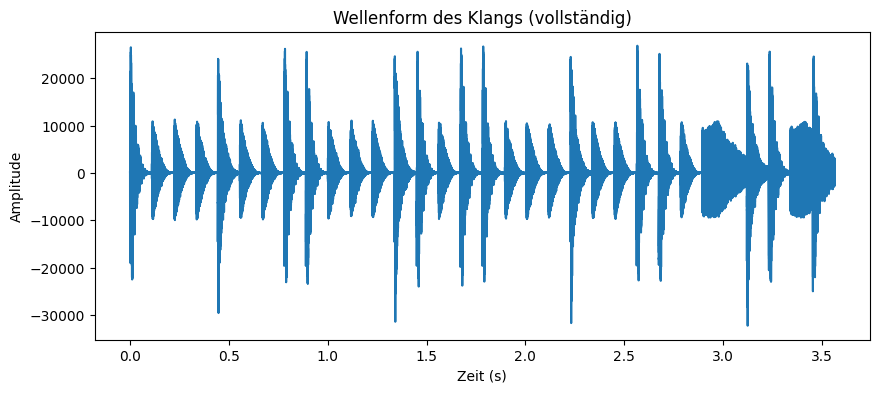

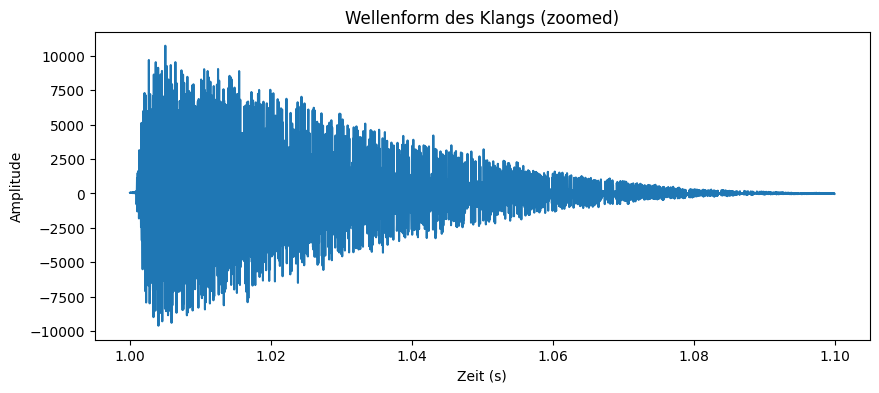

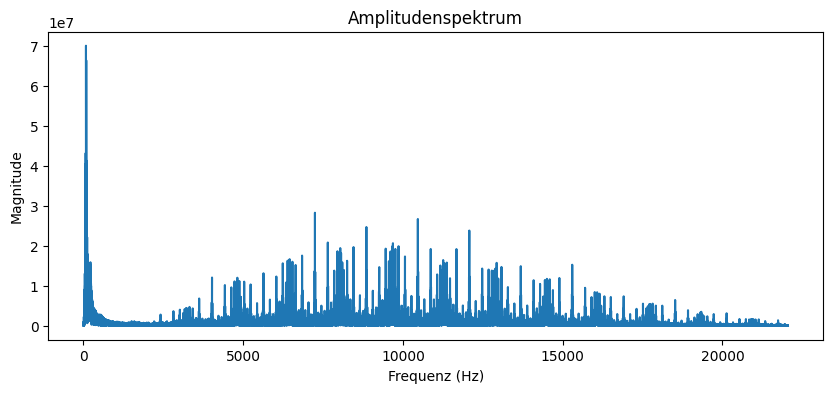

In [13]:
#CODE von chatGPT

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Sounddatei einlesen
sample_rate, stereo_data = wavfile.read('data/music.wav')

# Kanäle kombinieren
data = np.mean(stereo_data, axis=1)

# Zeitachse erstellen
duration = len(data) / sample_rate
time = np.linspace(0, duration, len(data))

# Wellenform plotten (vollständig)
plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.title('Wellenform des Klangs (vollständig)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.show()

# Kleinen Zeitbereich auswählen
start_time = 1.0  # Startzeitpunkt (in Sekunden)
end_time = 1.1  # Endzeitpunkt (in Sekunden)
start_index = int(start_time * sample_rate)
end_index = int(end_time * sample_rate)
zoomed_data = data[start_index:end_index]
zoomed_time = time[start_index:end_index]

# Wellenform plotten (zoomed)
plt.figure(figsize=(10, 4))
plt.plot(zoomed_time, zoomed_data)
plt.title('Wellenform des Klangs (zoomed)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.show()

# Amplitudenspektrum berechnen und plotten
spectrum = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), 1 / sample_rate)
positive_frequencies = frequencies[:len(frequencies) // 2]
spectrum_magnitude = np.abs(spectrum[:len(spectrum) // 2])

plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, spectrum_magnitude)
plt.title('Amplitudenspektrum')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Magnitude')
plt.show()


Das Amplitudenspektrum ist symmetrisch bezüglich des Vorzeichens, weil es aus der Fourier-Transformation der Wellenform berechnet wird. Die Fourier-Transformation verwendet komplexe Exponentialfunktionen, die symmetrisch sind und aus einer positiven und einer negativen Frequenzkomponente bestehen. Da die Amplituden des positiven und des negativen Frequenzbereichs gleich sind, ist das resultierende Amplitudenspektrum symmetrisch bezüglich des Vorzeichens.

## Aufgabe 3 b
(b) Trennen Sie den Sound-Signal in einen Teil oberhalb und unterhalb von 2 kHz in Frequenzen.
Identifizieren Sie jeweils die Top 5 Frequenzen in diesen Frequenzbereichen.

In [14]:
import numpy as np
from scipy.io import wavfile

# Sounddatei einlesen
sample_rate, stereo_data = wavfile.read('data/music.wav')

# Kanäle kombinieren
data = np.mean(stereo_data, axis=1)

# Fourier-Transformation durchführen
spectrum = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), 1 / sample_rate)

# Nur den positiven Frequenzbereich betrachten
positive_freq_indices = np.where(frequencies >= 0)[0]
positive_frequencies = frequencies[positive_freq_indices]
positive_spectrum = spectrum[positive_freq_indices]

# Frequenzbereiche definieren
lower_freq_range = np.where(positive_frequencies < 2000)[0]
upper_freq_range = np.where(positive_frequencies >= 2000)[0]

# Frequenzspektren für die beiden Bereiche extrahieren
lower_spectrum = positive_spectrum[lower_freq_range]
upper_spectrum = positive_spectrum[upper_freq_range]

# Top 5 Frequenzen und zugehörige Amplituden für jeden Bereich finden
top_5_lower_indices = np.argsort(np.abs(lower_spectrum))[-5:]
top_5_lower_frequencies = positive_frequencies[lower_freq_range][top_5_lower_indices]
top_5_lower_magnitudes = np.abs(lower_spectrum[top_5_lower_indices])

top_5_upper_indices = np.argsort(np.abs(upper_spectrum))[-5:]
top_5_upper_frequencies = positive_frequencies[upper_freq_range][top_5_upper_indices]
top_5_upper_magnitudes = np.abs(upper_spectrum[top_5_upper_indices])

# Ausgabe der Ergebnisse
print("Frequenzen unterhalb von 2 kHz:")
for freq, mag in zip(top_5_lower_frequencies, top_5_lower_magnitudes):
    print("Frequenz:", freq, "Hz, Amplitude:", mag)

print("\nFrequenzen oberhalb von 2 kHz:")
for freq, mag in zip(top_5_upper_frequencies, top_5_upper_magnitudes):
    print("Frequenz:", freq, "Hz, Amplitude:", mag)


Frequenzen unterhalb von 2 kHz:
Frequenz: 71.82913095760722 Hz, Amplitude: 43206796.35206252
Frequenz: 90.90874386822163 Hz, Amplitude: 63918752.204986595
Frequenz: 89.78641369700902 Hz, Amplitude: 66420593.76230239
Frequenz: 81.93010249852074 Hz, Amplitude: 69367156.11007474
Frequenz: 80.80777232730813 Hz, Amplitude: 70077827.15317045

Frequenzen oberhalb von 2 kHz:
Frequenz: 7649.521864442366 Hz, Amplitude: 20822621.047886465
Frequenz: 12078.236720047336 Hz, Amplitude: 23816741.045299392
Frequenz: 8857.42971120994 Hz, Amplitude: 24704736.115147796
Frequenz: 10467.692924357236 Hz, Amplitude: 26711284.158436682
Frequenz: 7246.885915519841 Hz, Amplitude: 28279197.06772638


C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_17032\2867444010.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, stereo_data = wavfile.read('data/music.wav')


## Aufgabe 3 c
(c) Berechnen Sie aus diesen beiden Teilen jeweils eine Rekonstruktion. Berechnen Sie den
Fehler der Rekonstruktion wie in Aufgabe 1 für die gefilterten Signale und schreiben Sie
die gefilterten rekonstruierten Daten in eine wav-Datei. Beschreiben und erklären Sie das
Ergebnis.

In [21]:
import numpy as np
from scipy.io import wavfile

# Sounddatei einlesen
sample_rate, stereo_data = wavfile.read('data/music.wav')

# Kanäle kombinieren
data = np.mean(stereo_data, axis=1)

# Fourier-Transformation durchführen
spectrum = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), 1 / sample_rate)

# Nur den positiven Frequenzbereich betrachten
positive_freq_indices = np.where(frequencies >= 0)[0]
positive_frequencies = frequencies[positive_freq_indices]

# Frequenzbereiche definieren
lower_freq_range = np.where(positive_frequencies < 2000)[0]
upper_freq_range = np.where(positive_frequencies >= 2000)[0]

# Frequenzspektren für die beiden Bereiche extrahieren
lower_spectrum = spectrum[lower_freq_range]
upper_spectrum = spectrum[upper_freq_range]

# Rekonstruktion der unteren Frequenzen
lower_reconstructed_spectrum = np.zeros(len(spectrum), dtype=np.complex128)
lower_reconstructed_spectrum[lower_freq_range] = lower_spectrum
lower_reconstructed_data = np.fft.ifft(lower_reconstructed_spectrum).real

# Rekonstruktion der oberen Frequenzen
upper_reconstructed_spectrum = np.zeros(len(spectrum), dtype=np.complex128)
upper_reconstructed_spectrum[upper_freq_range] = upper_spectrum
upper_reconstructed_data = np.fft.ifft(upper_reconstructed_spectrum).real

error_lower = relative_error(data, lower_reconstructed_data)
error_upper = relative_error(data, upper_reconstructed_data)

print("Fehler der Rekonstruktion der unteren Frequenzen:", error_lower)
print("Fehler der Rekonstruktion der oberen Frequenzen:", error_upper)

# Rekonstruierte Daten in eine WAV-Datei schreiben
wavfile.write('data/lower_reconstructed.wav', sample_rate, lower_reconstructed_data.astype(np.int16))
wavfile.write('data/upper_reconstructed.wav', sample_rate, upper_reconstructed_data.astype(np.int16))


Fehler der Rekonstruktion der unteren Frequenzen: 0.8278943250620674
Fehler der Rekonstruktion der oberen Frequenzen: 0.7072871080802547


C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_17032\2707493984.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, stereo_data = wavfile.read('data/music.wav')


In [19]:
frequencies

array([ 0.        ,  0.28058254,  0.56116509, ..., -0.84174763,
       -0.56116509, -0.28058254])

# Aufgabe 4.
In dieser Aufgabe analysieren und bearbeiten Sie eine Bilddatei (img.jpg). Sie dürfen dafür die fft
routine von numpy oder scipy verwenden.

## Aufgabe 4 a
(a) Plotten Sie die 2D-Verteilung der absoluten Werte der Fourier-Komponenten, sodass die
kleinsten k-Werte in der Mitte liegen. Erklären Sie die Natur der Verteilung.

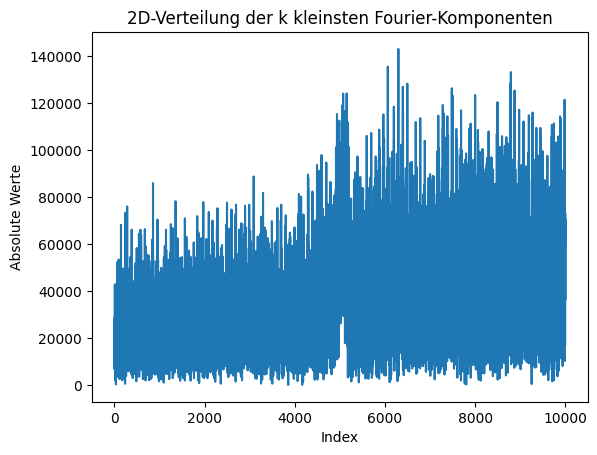

In [16]:
# CODE

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Laden des Bildes als numpy array
img = np.array(Image.open('data/img.jpg').convert('L'))

# Berechnung der DFT
fft = np.fft.fft2(img)

# Verschiebung der Fourier-Komponenten
fft_shifted = np.fft.fftshift(fft)

# Berechnung der absoluten Werte der Fourier-Komponenten
abs_fft = np.abs(fft_shifted)

# Plot der k kleinsten Werte in der Mitte
k = 100
mid = abs_fft.shape[0] // 2
center_k = abs_fft[mid-k//2:mid+k//2, mid-k//2:mid+k//2]

# Erstellen des Scatterplots
fig, ax = plt.subplots()
ax.plot(np.arange(center_k.size), center_k.flatten())
ax.set_xlabel('Index')
ax.set_ylabel('Absolute Werte')
ax.set_title('2D-Verteilung der k kleinsten Fourier-Komponenten')
plt.show()




## Aufgabe 4 b
(b) Entfernen Sie je die Fourier-Komponenten mit absoluter Amplitude unter dem Schwellenwert
0.001%, 0.01%, 0.1%, 1% und 10% der maximalen Amplitude. Führen Sie eine inverse
Fourier-Transformation durch und stellen Sie die gefilterten Fourierkomponenten sowie die
resultierenden Bilder dar. Beschreiben und erklären Sie die Unterschiede.

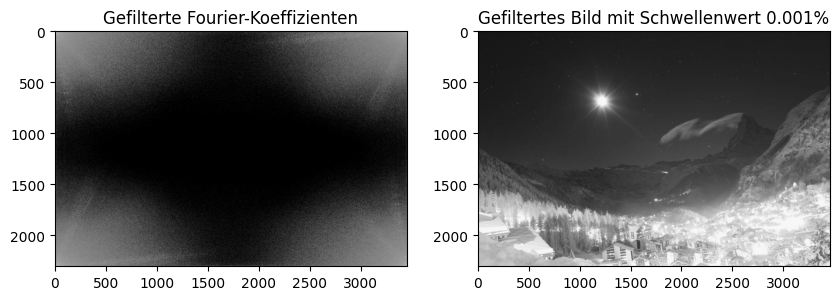

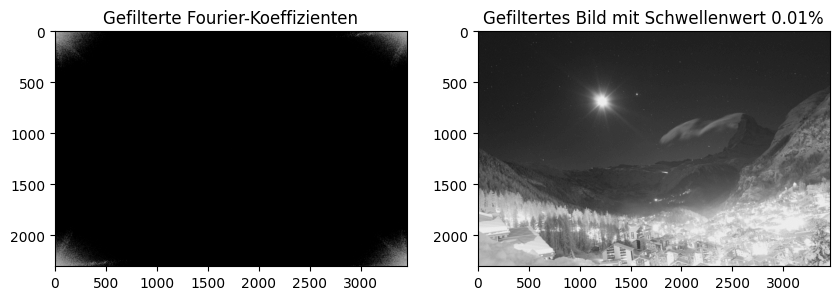

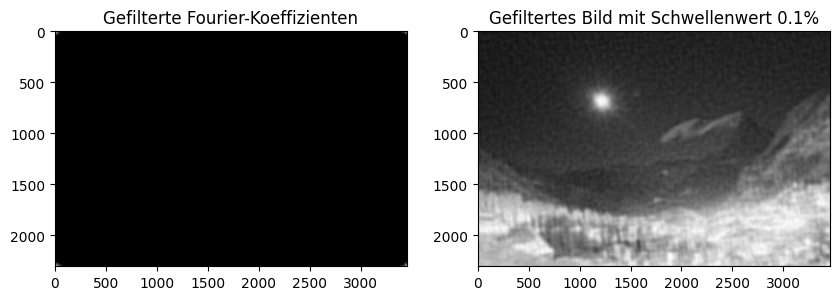

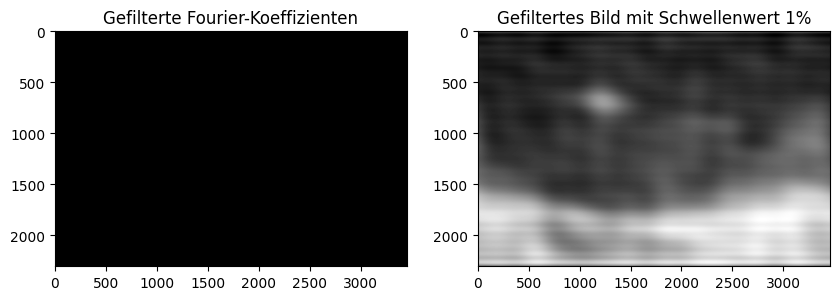

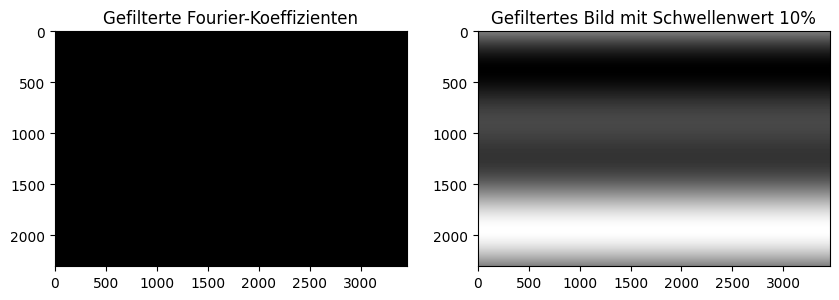

In [17]:
# CODE
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Laden des Bildes als numpy array
img = np.array(Image.open('data/img.jpg').convert('L'))

# Berechnung der DFT
fft = np.fft.fft2(img)

# Verschiebung der Fourier-Komponenten
fft_shifted = np.fft.fftshift(fft)

# Berechnung der absoluten Werte der Fourier-Komponenten
abs_fft = np.abs(fft_shifted)

# Bestimmung der maximalen Amplitude
max_amp = np.max(abs_fft)

# Schwellenwert-Prozentsätze
threshold_percents = [0.001, 0.01, 0.1, 1, 10]

# Filterung der Fourier-Komponenten für jeden Schwellenwert
filtered_ffts = []
for threshold_percent in threshold_percents:
    # Bestimmung des Schwellenwerts
    threshold_amp = max_amp * threshold_percent / 100.0
    
    # Erstellen einer Kopie der Fourier-Koeffizienten
    filtered_fft = fft_shifted.copy()
    
    # Filterung der Fourier-Koeffizienten
    filtered_fft[abs_fft < threshold_amp] = 0
    
    # Verschieben der Fourier-Komponenten zurück in die ursprüngliche Position
    filtered_fft = np.fft.ifftshift(filtered_fft)
    
    # Durchführung der inversen Fourier-Transformation
    filtered_img = np.abs(np.fft.ifft2(filtered_fft))
    
    # Speichern der gefilterten Fourier-Komponenten und des gefilterten Bildes
    filtered_ffts.append(filtered_fft)
    
    # Plot der gefilterten Fourier-Komponenten und des gefilterten Bildes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(np.log10(np.abs(filtered_fft) + 1), cmap='gray')
    axs[0].set_title('Gefilterte Fourier-Koeffizienten')
    axs[1].imshow(filtered_img, cmap='gray')
    axs[1].set_title('Gefiltertes Bild mit Schwellenwert ' + str(threshold_percent) + '%')
    plt.show()


## Aufgabe 4 c
(c) Berechnen Sie den Fehler (Aufgabe 1) zwischen rekonstruiertem und Originalbild. Wie weit
können die Daten kompressiert werden, ohne einen Fehler von höchstens 1% zu überschreiten?

MSE: 387.74013650338946


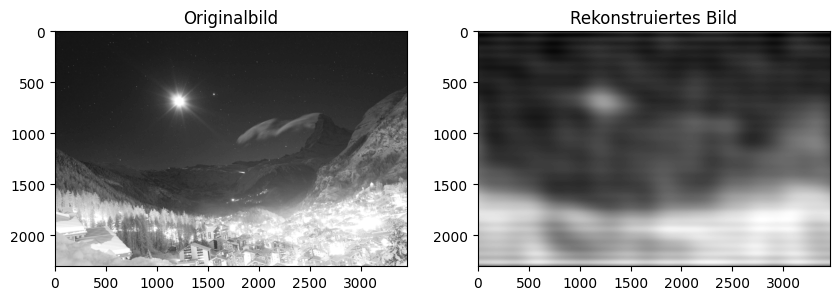

In [18]:
# CODE
import numpy as np
from PIL import Image

# Laden des Originalbildes als numpy array
img_orig = np.array(Image.open('data/img.jpg').convert('L'))

# Berechnung der DFT des Originalbildes
fft_orig = np.fft.fft2(img_orig)

# Verschiebung der Fourier-Komponenten des Originalbildes
fft_shifted_orig = np.fft.fftshift(fft_orig)

# Berechnung der absoluten Werte der Fourier-Komponenten des Originalbildes
abs_fft_orig = np.abs(fft_shifted_orig)

# Bestimmung des Schwellenwerts für eine Fehlergrenze von 1%
max_amp = np.max(abs_fft_orig)
threshold_amp = max_amp * 1 / 100.0

# Filterung der Fourier-Komponenten unter Verwendung des Schwellenwerts
filtered_fft = fft_shifted_orig.copy()
filtered_fft[abs_fft_orig < threshold_amp] = 0

# Verschiebung der Fourier-Komponenten des gefilterten Bildes
filtered_fft_shifted = np.fft.ifftshift(filtered_fft)

# Durchführung der inversen Fourier-Transformation, um das rekonstruierte Bild zu erhalten
img_filtered = np.abs(np.fft.ifft2(filtered_fft))

# Berechnung des mittleren quadratischen Fehlers (MSE) zwischen Original- und rekonstruiertem Bild
mse = np.mean((img_orig.astype(float) - img_filtered.astype(float))**2)

print('MSE:', mse)

import matplotlib.pyplot as plt

# Plotten des Originalbildes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Originalbild')

# Plotten des gefilterten Bildes
plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title('Rekonstruiertes Bild')

plt.show()



# Chatgpt

Für diese Aufgaben kann ChatGPT als Ressource genutzt werden, um Fragen zu stellen oder bei
Problemen Unterstützung zu erhalten. Vorraussetzung ist, dass Sie transparent kommunizieren,
wo und wie Sie ChatGPT eingesetzt haben und welche Verbesserungen nötig waren. Sie können
ChatGPT wie folgt nutzen:
• Stellen Sie Ihre Fragen klar und präzise.
• Formulieren Sie Ihre Fragen so, dass sie spezifisch auf Ihre Probleme abgestimmt sind.
• Seien Sie geduldig und geben Sie ChatGPT genügend Zeit, um eine sinnvolle Antwort zu
generieren.
• Verwenden Sie die Antworten von ChatGPT als eine Art von Hilfestellung und überprüfen
Sie diese stets auf ihre Richtigkeit.
Wenn Sie eine Frage stellen, die auf eine bestimmte Stelle in Ihrem Code Bezug nimmt, können
Sie den Code zusammen mit Ihrer Frage bereitstellen.

# Lerntagebuch

| Aufgabe | Schwierigkeit | Erkentnisse | Lernerfolg |
| --- | --- | --- | --- |
| 1 |  | | |
| 2 |  | | |
| 3 |  | | |
| 4 |  | | |



# Bewertungsraster

## Fourier-Approximation
1) Korrekte Implementierung der k-ten Fourier-Komponente
2) Korrekte Implementierung der Fourier-Approximation
3) Korrekte, verständliche und kompakte Plots der Funktionen und aller berechneten Approximationen
4) Korrekter relativer Fehler: mathematische Definition angegeben und korrekt implementiert
5) Korrekte Bestimmung der Anzahl der Fourier-Komponenten für einen relativen Fehler von
höchstens 0,1% bei f1, f2 und f3
6) Korrekte und verständliche Beschreibung und Erklärung der Unterschiede bei den Approximationen
der verschiedenen Funktionen
## Sonnenflecken
7) Korrekter Plot für Wellenform und Amplitudenspektrum
8) Korrekte Bestimmung der dominanten Periodizität der Schwingung in Jahren
9) Korrekte Identifizierung weiterer Perioden im Fourier-Spektrum in Jahren
10) Korrektes Entfernen von Komponenten und Durchführung einer Rücktransformation
11) Korrexte und verständliche Beschreibung und Erklärung der Ergebnisse nach dem Entfernen
von Komponenten
12) Korrekter und Verständlicher Vergleich der Ergebnisse mit denen aus Aufgabe 1 und
Erklärung der Unterschiede
## Musikbearbeitung
13) Korrekter Plot der Wellenform und des Amplitudenspektrums
14) Korrekte und verständliche Erklärung der Symmetrie des Amplitudenspektrums
15) Korrektes Trennen des Klangsignals in Frequenzbereiche und Identifizierung der jeweiligen
Top 5 Frequenzen in Hertz
16) Korrekte Rekonstruktion der gefilterten Signale
17) Korrekte Berechnung des Fehlers für die gefilterten rekonstruierten Signale
18) Korrekte und verständliche Beschreibung und Erklärung der Ergebnisse
Bildbearbeitung
19) Korrekter Plot der 2D-Verteilung der absoluten Werte der Fourier-Komponenten
20) Korrekte und verständliche Erklärung der Verteilung
21) Korrektes Entfernen von Fourier-Komponenten, Durchführung einer inversen Fourier-Transformation
und Darstellung der resultierenden Bilder
22) Korrexte und verständliche Beschreibung und Erklärung der Unterschiede in den Bildern
23) Korrekte Berechnung des Fehlers
24) Korrekte und leicht nachvollziehbare Bestimmung der maximal möglichen Kompression
## Präsentation, Kommunikation und Verständlichkeit
25) Klarer und logischer Aufbau des Notebooks
26) Verwendung aussagekräftiger und gut beschrifteter Diagramme
27) Das Notebook lässt sich vollständig und Fehlerfrei in weniger als 5 Minuten ausführen
28) Der Code ist gut strukturiert und verständlich kommentiert.
29) Die Ergebnisse werden am Ende des Notebooks so zusammengefasst, dass diese Zusammenfassung
eigenständig verständlich ist.
30) Das Lerntagebuch ist kurz und verständlich geschrieben, zeigt den Lernfortschritt auf und
macht mit den Kommentaren deutlich, wie und wofür ChatGPT und andere Tools verwendet
wurden.